In [3]:
import warnings
warnings.filterwarnings('ignore')
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.cm as cm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import datetime as dt
from osgeo import osr
import numpy as np
import glob

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

In [12]:
def get_radar_locations():

    radars = {}
    radar = {}
    radar['name'] = 'ASR Dresden'
    radar['wmo'] = 10487
    radar['lon'] = 13.76347
    radar['lat'] = 51.12404
    radar['alt'] = 261
    radars['ASD'] = radar
    
    radar = {}
    #### Kordinaten un hoehe checken! Neu
    # Hoehe üNN 2m
    # Turm 55 m
    #radar['name'] = 'Borkum'
    #radar['wmo'] = 10103
    #radar['lon'] = 6.748292
    #radar['lat'] = 53.564011
    #radar['alt'] = 57.
    #radars['ASB'] = radar
    
    #Fake Borkum/Emden
    radar['name'] = 'Borkum'
    radar['wmo'] = 10103
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58.
    radars['ASB'] = radar

    radar = {}
    radar['name'] = 'Boostedt'
    radar['wmo'] = 10132
    radar['lon'] = 10.04687
    radar['lat'] = 54.00438
    radar['alt'] = 124.56
    radars['BOO'] = radar

    radar = {}
    radar['name'] = 'Dresden'
    radar['wmo'] = 10488
    radar['lon'] = 13.76865
    radar['lat'] = 51.12465
    radar['alt'] = 263.36
    radars['DRS'] = radar

    radar = {}
    radar['name'] = 'Eisberg'
    radar['wmo'] = 10780
    radar['lon'] = 12.40278
    radar['lat'] = 49.54066
    radar['alt'] = 798.79
    radars['EIS'] = radar

    radar = {}
    radar['name'] = 'Emden'
    radar['wmo'] = 10204
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58
    radars['EMD'] = radar

    radar = {}
    radar['name'] = 'Essen'
    radar['wmo'] = 10410
    radar['lon'] = 6.96712
    radar['lat'] = 51.40563
    radar['alt'] = 185.10
    radars['ESS'] = radar

    radar = {}
    radar['name'] = 'Feldberg'
    radar['wmo'] = 10908
    radar['lon'] = 8.00361
    radar['lat'] = 47.87361
    radar['alt'] = 1516.10
    radars['FBG'] = radar

    radar = {}
    radar['name'] = 'Flechtdorf'
    radar['wmo'] = 10440
    radar['lon'] = 8.802
    radar['lat'] = 51.3112
    radar['alt'] = 627.88
    radars['FLD'] = radar

    radar = {}
    radar['name'] = 'Hannover'
    radar['wmo'] = 10339
    radar['lon'] = 9.69452
    radar['lat'] = 52.46008
    radar['alt'] = 97.66
    radars['HNR'] = radar

    radar = {}
    radar['name'] = 'Neuhaus'
    radar['wmo'] = 10557
    radar['lon'] = 11.13504
    radar['lat'] = 50.50012
    radar['alt'] = 878.04
    radars['NEU'] = radar

    radar = {}
    radar['name'] = 'Neuheilenbach'
    radar['wmo'] = 10605
    radar['lon'] = 6.54853
    radar['lat'] = 50.10965
    radar['alt'] = 585.84
    radars['NHB'] = radar

    radar = {}
    radar['name'] = 'Offenthal'
    radar['wmo'] = 10629
    radar['lon'] = 8.71293
    radar['lat'] = 49.9847
    radar['alt'] = 245.80
    radars['OFT'] = radar

    radar = {}
    radar['name'] = 'Proetzel'
    radar['wmo'] = 10392
    radar['lon'] = 13.85821
    radar['lat'] = 52.64867
    radar['alt'] = 193.92
    radars['PRO'] = radar

    radar = {}
    radar['name'] = 'Memmingen'
    radar['wmo'] = 10950
    radar['lon'] = 10.21924
    radar['lat'] = 48.04214
    radar['alt'] = 724.40
    radars['MEM'] = radar

    radar = {}
    radar['name'] = 'Rostock'
    radar['wmo'] = 10169
    radar['lon'] = 12.05808
    radar['lat'] = 54.17566
    radar['alt'] = 37
    radars['ROS'] = radar

    radar = {}
    radar['name'] = 'Isen'
    radar['wmo'] = 10873
    radar['lon'] = 12.10177
    radar['lat'] = 48.1747
    radar['alt'] = 677.77
    radars['ISN'] = radar

    radar = {}
    radar['name'] = 'Tuerkheim'
    radar['wmo'] = 10832
    radar['lon'] = 9.78278
    radar['lat'] = 48.58528
    radar['alt'] = 767.62
    radars['TUR'] = radar

    radar = {}
    radar['name'] = 'Ummendorf'
    radar['wmo'] = 10356
    radar['lon'] = 11.17609
    radar['lat'] = 52.16009
    radar['alt'] = 183
    radars['UMM'] = radar

    
    return radars


In [41]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==6.748292) & (lat0[rrr]==53.564011) & (alt0[rrr]==57.):
            print ("Elevationen bei Borkum geändert!")
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        grid = wrl.georef.polar.spherical_to_proj(polargrid[0], polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [3]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==7.02377) & (lat0[rrr]==53.33872) & (alt0[rrr]==58.):
            print ("Elevationen bei Emden eingestellt!")
            # Hier werden einfach alle Elevation auf eins gesetzt und mit der 0.9 Elevation wie in Emden eingestellt
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        r = polargrid[0]

        theta = metadata[rrr]['elev']

        rrrc = r.T * np.cos(np.deg2rad(theta))
        rrrc = rrrc.T
        print (rrrc.shape, polargrid[1].shape, elevgrid[1].shape)
        #print np.unique(elevgrid[0])
        grid = wrl.georef.polar.spherical_to_proj(rrrc, polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [4]:
#Einlesen aller DX Standorte
#all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)
all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)

('10103', '10103', 7.02377, 53.33872, 'Borkum')
('10132', '10132', 10.04687, 54.00438, 'Boostedt')
('10169', '10169', 12.05808, 54.17566, 'Rostock')
('10339', '10339', 9.69452, 52.46008, 'Hannover')
('10356', '10356', 11.17609, 52.16009, 'Ummendorf')
('10392', '10392', 13.85821, 52.64867, 'Proetzel')
('10410', '10410', 6.96712, 51.40563, 'Essen')
('10440', '10440', 8.802, 51.3112, 'Flechtdorf')
('10488', '10488', 13.76865, 51.12465, 'Dresden')
('10557', '10557', 11.13504, 50.50012, 'Neuhaus')
('10605', '10605', 6.54853, 50.10965, 'Neuheilenbach')
('10629', '10629', 8.71293, 49.9847, 'Offenthal')
('10780', '10780', 12.40278, 49.54066, 'Eisberg')
('10832', '10832', 9.78278, 48.58528, 'Tuerkheim')
('10873', '10873', 12.10177, 48.1747, 'Isen')
('10908', '10908', 8.00361, 47.87361, 'Feldberg')
('10950', '10950', 10.21924, 48.04214, 'Memmingen')
['Borkum', 'Boostedt', 'Rostock', 'Hannover', 'Ummendorf', 'Proetzel', 'Essen', 'Flechtdorf', 'Dresden', 'Neuhaus', 'Neuheilenbach', 'Offenthal', 'E

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


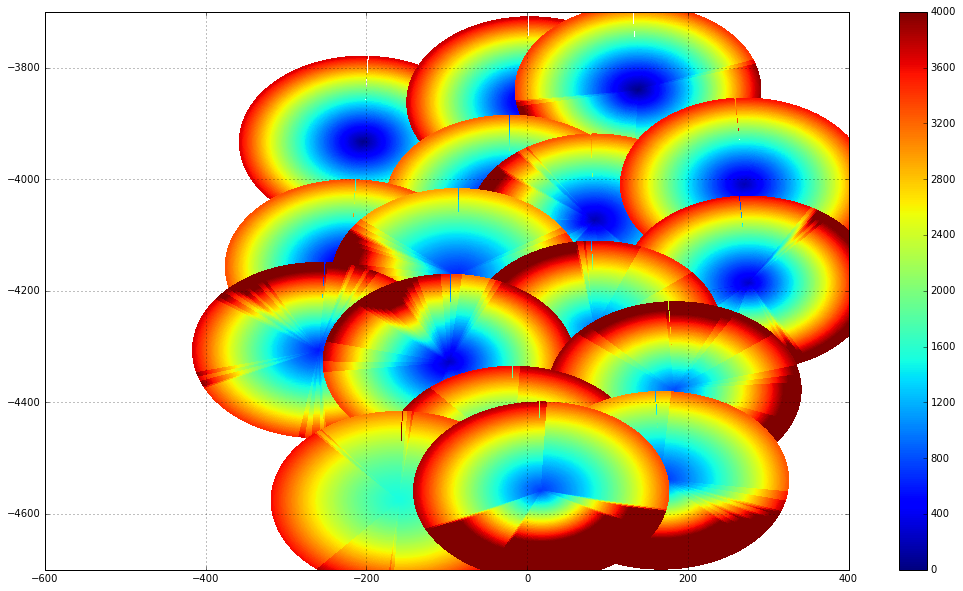

In [5]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    print plpl
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

In [21]:
# RADOLAN GRID LADEN
print(wrl.georef.get_radolan_grid().shape)
x = wrl.georef.get_radolan_grid()[:,:,0]
y = wrl.georef.get_radolan_grid()[:,:,1]
print (x.shape, y.shape)

(900, 900, 2)
((900, 900), (900, 900))


### Interpolate dx on RADOLAN gird
-------------------------------

In [23]:
def ipoli_radi(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min

In [ ]:
def ipoli_radi_dem(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min

In [8]:
%%time

#dx
xy_dx = np.vstack((all_lon.ravel(), all_lat.ravel())).transpose()
#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan_max, h_on_radolan_min = ipoli_radi(xy_dx, all_alt.ravel(), grid_xy, 1.5)
h_on_radolan_max = h_on_radolan_max.reshape(x.shape)
h_on_radolan_min = h_on_radolan_min.reshape(x.shape)

CPU times: user 3h 50min 37s, sys: 7.21 s, total: 3h 50min 44s
Wall time: 3h 51min 6s


In [20]:
ZP = '201803072145'
import wradlib

pfad = ('/automount/radar/dwd/ry/2014/2014-09/2014-09-18/raa01-ry_10000-1409182140-dwd---bin')

rw_filename = wradlib.util.get_wradlib_data_file(pfad)


rwdata, rwattrs = wradlib.io.read_RADOLAN_composite(rw_filename)


radolan_grid_xy = wradlib.georef.get_radolan_grid(900,900)
x1 = radolan_grid_xy[:,:,0]
y1 = radolan_grid_xy[:,:,1]
rwdata1 = np.ma.masked_equal(rwdata, -9999) / 2 - 32.5



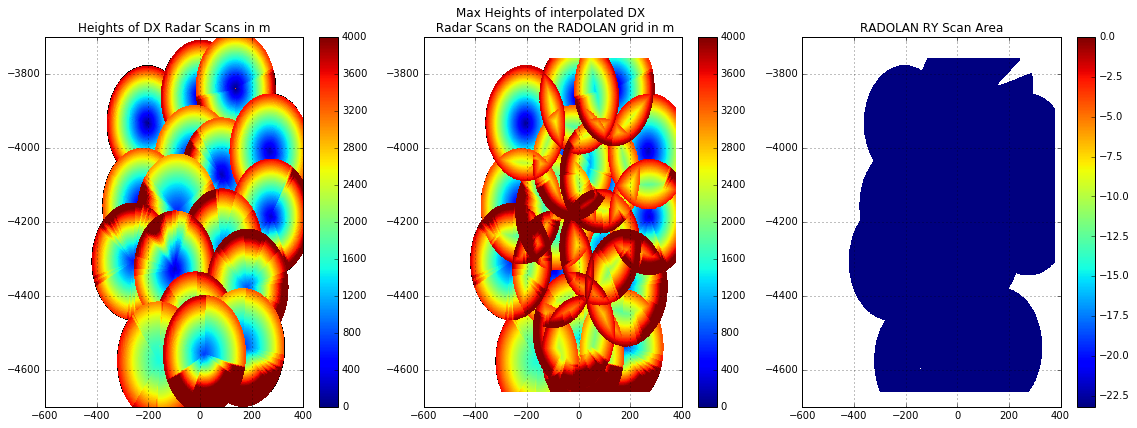

In [18]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,2)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_max), vmin=0, vmax=4000)
plt.title('Max Heights of interpolated DX \n Radar Scans on the RADOLAN grid in m')

plt.grid()
plt.colorbar()

plt.subplot(1,3,1)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')

for plpl in range(all_lon.shape[0]):
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.title('Heights of DX Radar Scans in m')
plt.grid()


plt.subplot(1,3,3)
plt.pcolormesh(x1,y1,rwdata1, vmin=0)
plt.title('RADOLAN RY Scan Area')
plt.colorbar()
plt.grid()

plt.tight_layout()
plt.savefig("/automount/ftp/velibor/RY_H_max_testradius1500m.png")


In [13]:
# Save
#np.save("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy",[x,y, h_on_radolan_max])
#np.save("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy",[x,y, h_on_radolan_min])


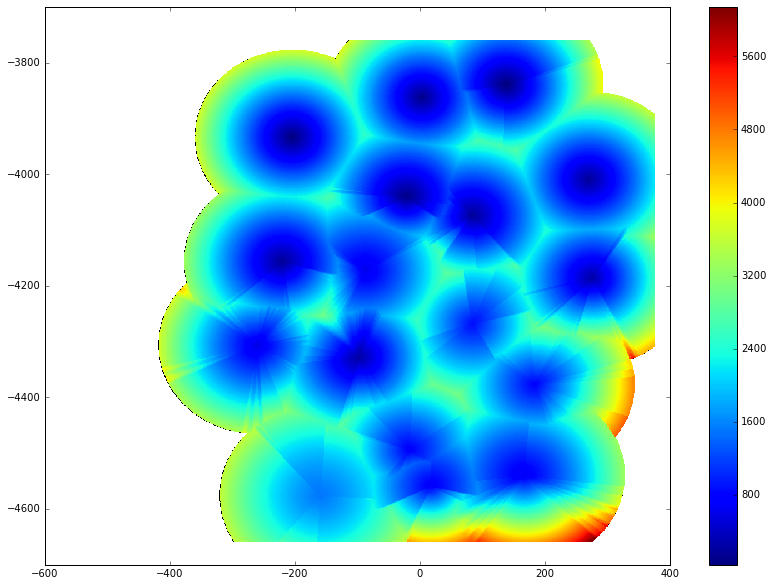

In [19]:
plt.figure(figsize=(14,10))
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_min))
plt.colorbar()

In [17]:
degi= np.arange(0.5,1.9,0.1)
abstand = np.cos(np.deg2rad(degi))*128
print abstand


[127.99512615 127.99298168 127.99044732 127.98752307 127.98420896
 127.98050498 127.97641115 127.97192748 127.96705399 127.96179069
 127.9561376  127.95009473 127.9436621  127.93683973]


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1264: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba = np.fromstring(s, np.uint8)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1264: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba = np.fromstring(s, np.uint8)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1264: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba = np.fromstring(s, np.uint8)


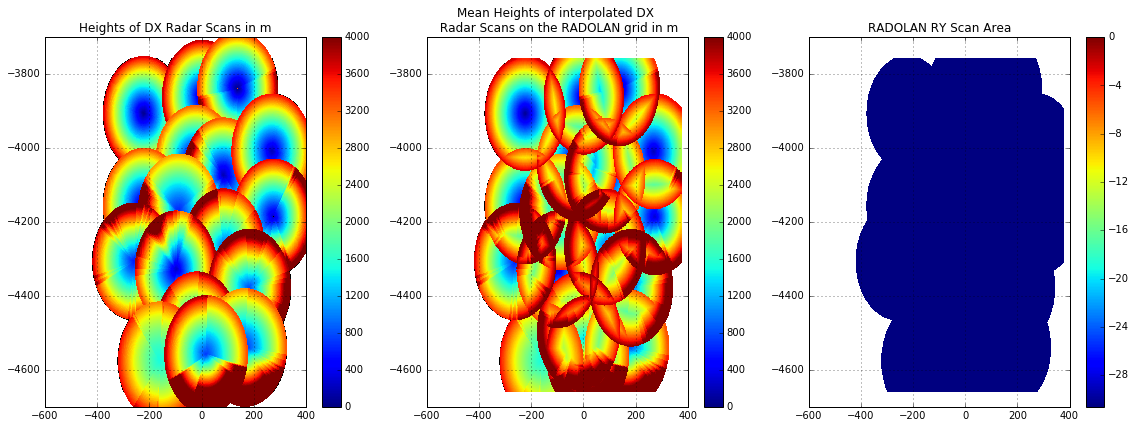

In [18]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,2)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan), vmin=0, vmax=4000)
plt.title('Mean Heights of interpolated DX \n Radar Scans on the RADOLAN grid in m')

plt.grid()
plt.colorbar()

plt.subplot(1,3,1)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')

for plpl in range(all_lon.shape[0]):
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.title('Heights of DX Radar Scans in m')
plt.grid()


plt.subplot(1,3,3)
plt.pcolormesh(x1,y1,rwdata1, vmin=0)
plt.title('RADOLAN RY Scan Area')
plt.colorbar()
plt.grid()

plt.tight_layout()
plt.savefig("/automount/ftp/velibor/RY_H2_max.pdf")


In [4]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy")

In [5]:
from pcc import plot_borders
from pcc import plot_radar
from pcc import plot_radar2
from pcc import plot_dem

In [6]:

def plot_radar3(bx,by, ax, reproject=False, cband=False, col=False):
    # Plot der Radar Range von Bonn
    import wradlib as wrl
    import numpy as np
    from osgeo import osr
    import matplotlib as mpl

    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)
    x_loc, y_loc = (bx, by)


    r = np.arange(1, 101) * 1000

    if cband==True:
        r = np.arange(1, 151) * 1000

    # azimuth array 1 degree spacing
    az = np.linspace(0, 360, 361)[0:-1]

    # build polygons for maxrange rangering
    polygons = wrl.georef.polar2polyvert(r, az,
                                         (x_loc, y_loc))
    polygons.shape = (len(az), len(r), 5, 2)
    polygons = polygons[:, -1, :, :]




    if reproject:
        # reproject to radolan polar stereographic projection
        polygons = wrl.georef.reproject(polygons,
                                        projection_source=proj_wgs,
                                        projection_target=proj_stereo)

        # reproject lonlat radar location coordinates to
        # polar stereographic projection
        x_loc, y_loc = wrl.georef.reproject(x_loc, y_loc,
                                            projection_source=proj_wgs,
                                            projection_target=proj_stereo)



    # create PolyCollections and add to respective axes
    polycoll = mpl.collections.PolyCollection(polygons, closed=True,
                                              edgecolors=col,
                                              facecolors=col,
                                              zorder=2,
                                              alpha=0.7, lw=0.3)

    ax.add_collection(polycoll, autolim=True)

    # plot radar location and information text
    #print np.unique(polygons)
    ax.plot(x_loc, y_loc, 'or', markersize=8, mew=2)
    #ax.text(x_loc, y_loc, 'BoXPol', color='k', fontsize=10)

In [7]:
def plot_all_cband(ax):
    for i in get_radar_locations().keys():

        if i =='EMD':
            pass
        else:
            plot_radar2(get_radar_locations()[i]['lon'],
                        get_radar_locations()[i]['lat'], ax , reproject=True, cband=True, col='black')

def plot_all_cband2(ax):
    for i in get_radar_locations().keys():

        if i =='EMD':
            pass
        else:
            plot_radar3(get_radar_locations()[i]['lon'],
                        get_radar_locations()[i]['lat'], ax , reproject=True, cband=True, col='black')
            


In [8]:
def plot_dem(ax):
    from matplotlib.colors import LogNorm
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.ticker as ticker
    import matplotlib.pyplot as plt
    filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
    # pixel_spacing is in output units (lonlat)
    ds = wrl.io.open_raster(filename)
    # pixel_spacing is in output units (lonlat)
    ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
    rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
    # specify kwargs for plotting, using terrain colormap and LogNorm
    dem = ax.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                        rastervalues, cmap='jet', 
                        vmin=1, vmax=np.nanmax(rastervalues))
    # make some space on the right for colorbar axis
    div1 = make_axes_locatable(ax)
    cax1 = div1.append_axes("right", size="5%", pad=0.1)
    # add colorbar and title
    # we use LogLocator for colorbar
    cb = plt.gcf().colorbar(dem, cax=cax1)
    cb.set_label('terrain height [m]')

pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


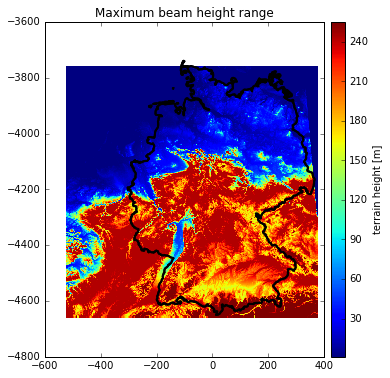

In [9]:
fig = plt.figure(figsize=(6,6))

ax3 = fig.add_subplot(111, aspect='equal')
#plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0, vmax=4000, cmap=cmap, norm=norm2 )
plt.title('Maximum beam height range')
plot_borders(ax3)
#plot_all_cband(ax3)
plot_dem(ax3)

In [10]:
rhmax_1d = rhmax[2].reshape(900*900)
rhmax_1d = rhmin[2].reshape(900*900)

pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:502: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)
pcc.py:502: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python

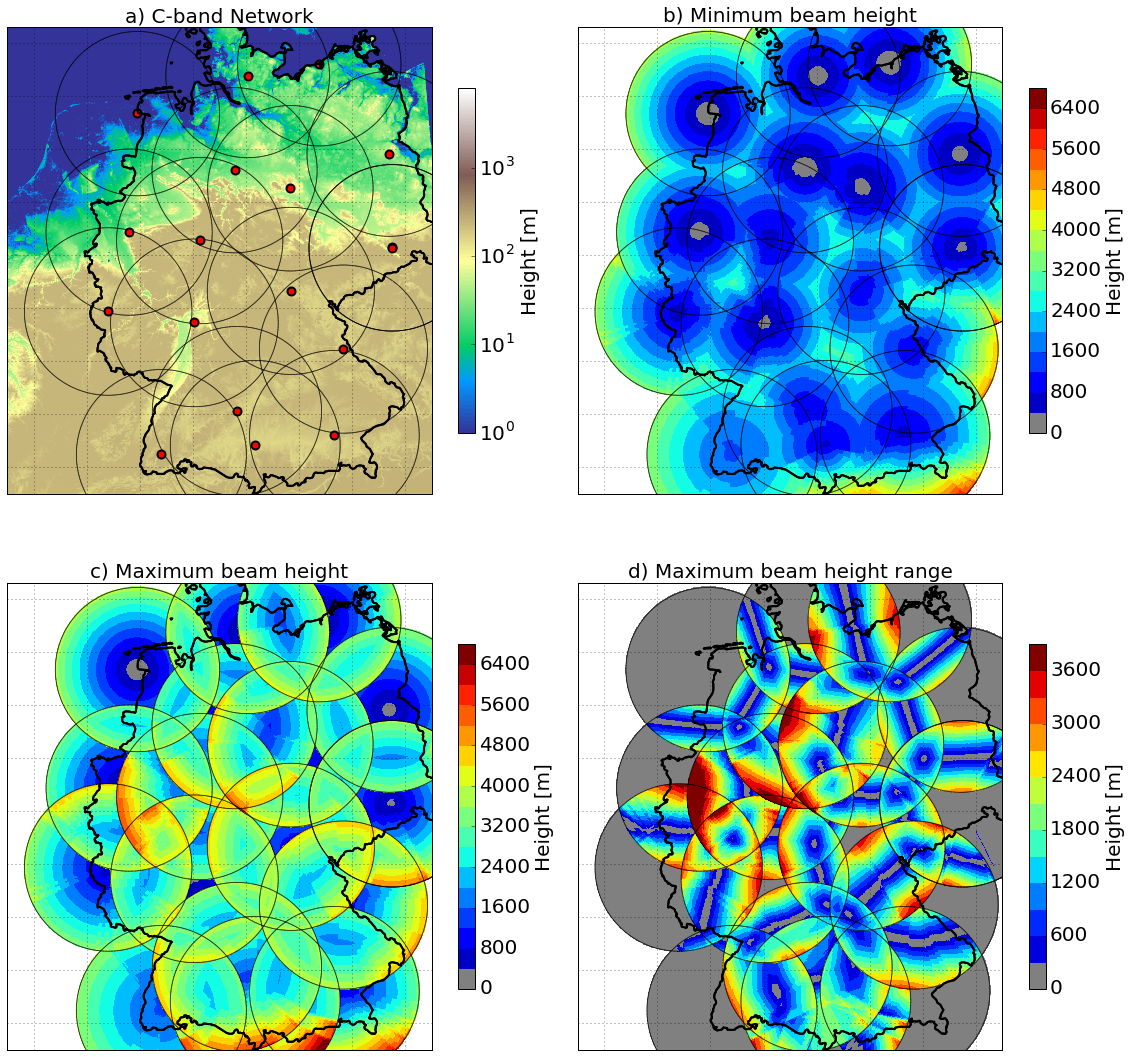

In [13]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,7000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6


fig = plt.figure(figsize=(16,16))


ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(rhmax[2]), vmin=0, vmax=7000, cmap=cmap, norm=norm)
plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        right='off',
        left='off',
        labelleft='off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)

ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmin[2]), vmin=0, vmax=7000, cmap=cmap, norm=norm )
plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        right='off',
        left='off',
        labelleft='off')


cmap2 = plt.cm.jet
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)


ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0, vmax=4000, cmap=cmap, norm=norm2 )
plt.title('d) Maximum beam height range', fontsize=20)
plot_borders(ax3)
plot_all_cband(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        right='off',
        left='off',
        labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)



ax4 = fig.add_subplot(221, aspect='equal')
#plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0, vmax=4000, cmap=cmap, norm=norm2 )
plt.title('a) C-band Network', fontsize=20)
plot_all_cband2(ax4)
plot_borders(ax4)

#plot_dem(ax4)

cmap3 = plt.cm.terrain
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    rastervalues+1,  cmap=cm.terrain, norm=LogNorm() ,
                    vmin=1, vmax=8000)
# make some space on the right for colorbar axis
#div1 = make_axes_locatable(ax4)
#cax1 = div1.append_axes("right", size="5%", pad=0.1)
# add colorbar and title

# we use LogLocator for colorbar
#cb = plt.gcf().colorbar(dem, cax=cax1,
#                       ticks=ticker.LogLocator(subs=range(10)))
#cb.set_label('Height [m]', fontsize=15)
#cb.ax.tick_params(labelsize=15)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        right='off',
        left='off',
        labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [32]:
rastervalues.shape, rastercoords.shape

((899, 900), (900, 901, 2))

In [24]:
#dx
xy_dem = np.vstack((rastercoords[...,0].ravel(), rastercoords[...,1].ravel())).transpose()

#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

dem_on_radolan_max, dem_on_radolan_min = ipoli_radi(xy_dem, rastervalues.ravel(), grid_xy, 1.5)
dem_on_radolan_max = dem_on_radolan_max.reshape(x.shape)
dem_on_radolan_min = dem_on_radolan_min.reshape(x.shape)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 809100 but corresponding boolean dimension is 810900

ValueError: to_rgba: Invalid rgba arg "[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10178265 0.7537718  0.23732813 0.
 0.05218579 0.11778303 0.77866936 0.64747715 0.01769963 0.
 0.         0.         0.         0.         0.         0.
 0.05218579 0.01769963 0.         0.         0.         0.
 0.14903556 0.10178265 0.01769963 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16430308 0.19415602 0.0350913  0.         0.
 0.         0.         0.05218579 0.13353144 0.4172995  0.4054651
 0.47445804 0.8498457  1.2476479  1.2976583  1.3265064  1.4594454
 1.6650077  1.7976942  1.9760633  2.0267375  2.1400661  2.2680676
 2.2863832  2.2809236  2.358155   2.3946433  2.4937956  2.519998
 2.481926   2.481926   2.5649493  2.5839975  2.6542475  2.713985
 2.7669928  2.7869935  2.8076801  2.8498805  3.0090363  3.0869758
 3.1151013  3.0804343  3.0796137  2.9912581  3.0538328  3.1942904
 3.2245739  3.1339402  2.8883855  1.7112206  0.10178265 0.14903556
 1.3591434  1.9042375  1.8718022  2.1872544  2.384823   1.3217559
 0.06899284 0.61903924 1.9459102  2.3946433  1.5001012  0.35667497
 0.9718605  1.4759065  2.1295063  2.4729304  1.933073   1.1451323
 0.         0.19415602 1.5353299  2.4235377  2.60665    2.6105947
 2.7339036  2.65926    2.4623322  2.146349   1.5468023  0.26510778
 0.01769963 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.6514021  2.7968457  3.128482   3.1370459  2.3290184
 0.80296206 0.20875478 0.05218579 0.31845373 0.06899284 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.72823846
 0.49643683 0.         0.         0.         0.         0.
 0.10178265 0.5996211  1.9611003  2.2399495  2.0384336  1.7767667
 1.4880772  0.23732813 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.5285252  0.85745025 1.3907487  1.6271375
 1.675092   1.7491999  1.5618969  1.5804504  1.4039938  1.0866362
 1.2425065  1.1895841  1.1337036  1.3545457  1.4552872  1.7646085
 1.7584734  1.7014961  1.6236225  1.6058601  1.8935422  2.0290875
 1.5543782  0.6751287  0.01769963 0.         0.         0.
 0.27871338 0.10178265 0.         0.         0.14903556 0.05218579
 0.         0.         0.         0.         0.         0.
 0.         0.01769963 0.22314355 0.31845373 0.06899284 0.
 0.         0.         0.46328467 1.4083704  1.803594   2.1166859
 1.9932415  1.9810015  2.1080465  2.3237872  2.6454146  2.6948686
 2.4714234  1.9661129  1.7240413  1.8382795  1.8690512  1.8523841
 1.7079896  1.6514021  1.5198257  1.2829161  1.0866362  1.8523841
 1.2927682  0.77866936 0.46328467 0.05218579 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]"
length of rgba sequence should be either 3 or 4

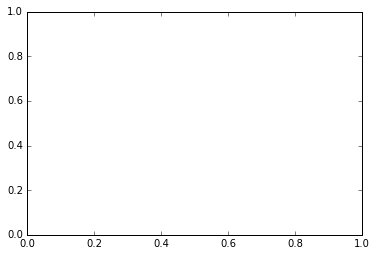

In [44]:
plt.scatter(rastercoords[...,0], rastercoords[...,1], c=np.log(rastervalues+1.))

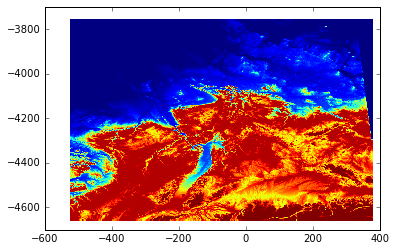

In [45]:
plt.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    rastervalues+1)

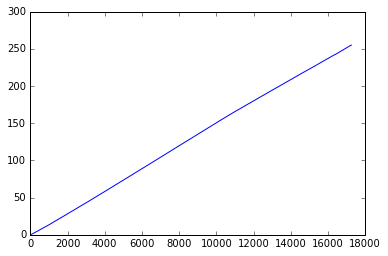

In [46]:
plt.plot(np.unique(rastervalues))

In [41]:
rastervalues.min()

0.0

In [42]:
np.log10(0.)

-inf